# ⚛ **Text Summarization using NLP  techniquies**

---
#### **[ Word Frequency,   TF-IDF, and  BART  ]**

---

# ⚾ **Sunil Chhetri to be felicitated for 150th international before FIFA World Cup 2026 qualifier**
Sunil Chhetri first donned the Senior National Team jersey on June 12, 2005, in a friendly match against Pakistan in Quetta and has went on to represent the tricolour 148 more times.

**Published** : Mar 23, 2024 18:55 IST, Chennai

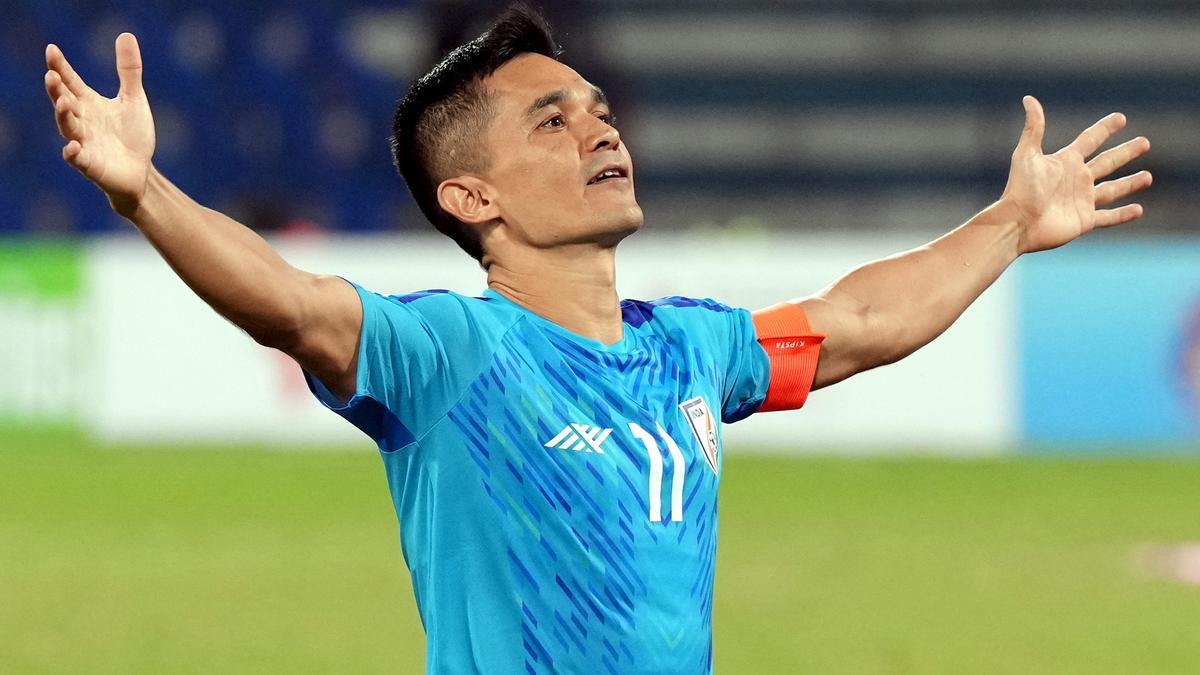

Chhetri is the third-highest active goalscorer (93 goals) in international football, just below Cristiano Ronaldo (128 goals) and Lionel Messi (106 goals). | Photo Credit: PTI

Article ✈
https://sportstar.thehindu.com/football/indian-football/sunil-chhetri-felicitated-150-international-appearances-fifa-world-cup-qualifier-india-vs-afghanistan/article67984404.ece


In [1]:
## input text article
article_text='''Sunil Chhetri, the captain of the Indian Men’s National team, will be felicitated by the All India Football Federation (AIFF),
who is expected to play his 150th Senior International match in the FIFA World Cup 2026 qualifier on March 26.
India, after drawing with Afghanistan in the away leg, will host it at the Indira Gandhi International Stadium in Guwahati.
This round will also serve as the second round of preliminary joint qualification for the AFC Asian Cup 2027.
“It’s been an awe-inspiring and staggering cruise that all of us have been fortunate to witness since 2005. Chhetri playing his 150th
international match is an extraordinary accomplishment that will go a long way in keeping the Indian football flag flying high,” Kalyan Chaubey,
the president of AIFF, said.

Chhetri first donned the Senior National Team jersey on June 12, 2005, in a friendly match against Pakistan in Quetta. He also scored in the 1-1 draw.
Since then, he has made 149 appearances for the National Team, netting a record 93 goals. Chhetri holds the unique record of scoring at least one
goal in his first, 25th, 50th, 75th, 100th and 125th match for the Blue Tigers.
He is also the third-highest active goalscorer (93 goals) in international football, just below Cristiano Ronaldo (128 goals) and Lionel Messi (106 goals).
“In many football fans’ eyes, Chhetri is almost the synonym of the Indian Men’s National Team, something that is not far from the truth.
He is a fabulous footballer, a cool captain, and a star striker,” M Satyanarayan, the Acting General Secretary of AIFF, said.'''


## **Import Modules**

In [2]:
!pip install nltk

In [3]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

## **Data Preprocessing**

In [5]:
article_text = article_text.lower() #converting the article text into lower case
article_text

'sunil chhetri, the captain of the indian men’s national team, will be felicitated by the all india football federation (aiff),\nwho is expected to play his 150th senior international match in the fifa world cup 2026 qualifier on march 26.\nindia, after drawing with afghanistan in the away leg, will host it at the indira gandhi international stadium in guwahati.\nthis round will also serve as the second round of preliminary joint qualification for the afc asian cup 2027.\n“it’s been an awe-inspiring and staggering cruise that all of us have been fortunate to witness since 2005. chhetri playing his 150th\ninternational match is an extraordinary accomplishment that will go a long way in keeping the indian football flag flying high,” kalyan chaubey,\nthe president of aiff, said.\n\nchhetri first donned the senior national team jersey on june 12, 2005, in a friendly match against pakistan in quetta. he also scored in the 1-1 draw.\nsince then, he has made 149 appearances for the national t

▶ **Tokenization**

In [6]:
# split into sentence list
sentence_list = sent_tokenize(article_text)
sentence_list

['sunil chhetri, the captain of the indian men’s national team, will be felicitated by the all india football federation (aiff),\nwho is expected to play his 150th senior international match in the fifa world cup 2026 qualifier on march 26.\nindia, after drawing with afghanistan in the away leg, will host it at the indira gandhi international stadium in guwahati.',
 'this round will also serve as the second round of preliminary joint qualification for the afc asian cup 2027.',
 '“it’s been an awe-inspiring and staggering cruise that all of us have been fortunate to witness since 2005. chhetri playing his 150th\ninternational match is an extraordinary accomplishment that will go a long way in keeping the indian football flag flying high,” kalyan chaubey,\nthe president of aiff, said.',
 'chhetri first donned the senior national team jersey on june 12, 2005, in a friendly match against pakistan in quetta.',
 'he also scored in the 1-1 draw.',
 'since then, he has made 149 appearances for

In [7]:
# remove spaces, punctuations and numbers
clean_text = re.sub('[^a-zA-Z]', ' ', article_text)
clean_text = re.sub('\s+', ' ', clean_text)
clean_text

'sunil chhetri the captain of the indian men s national team will be felicitated by the all india football federation aiff who is expected to play his th senior international match in the fifa world cup qualifier on march india after drawing with afghanistan in the away leg will host it at the indira gandhi international stadium in guwahati this round will also serve as the second round of preliminary joint qualification for the afc asian cup it s been an awe inspiring and staggering cruise that all of us have been fortunate to witness since chhetri playing his th international match is an extraordinary accomplishment that will go a long way in keeping the indian football flag flying high kalyan chaubey the president of aiff said chhetri first donned the senior national team jersey on june in a friendly match against pakistan in quetta he also scored in the draw since then he has made appearances for the national team netting a record goals chhetri holds the unique record of scoring at

▶ **Removal of stop words**

In [8]:
# removing stop words from the clean text.
stopwords = nltk.corpus.stopwords.words('english')
stopwords[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

# **1.Text Summarization Using Word Frequency**

▶ **Word Frequencies**

In [9]:
word_frequencies = {}
for word in nltk.word_tokenize(clean_text):
    if word not in stopwords:
        if word not in word_frequencies:
            word_frequencies[word] = 1
        else:
            word_frequencies[word] += 1

In [10]:
word_frequencies

{'sunil': 1,
 'chhetri': 5,
 'captain': 2,
 'indian': 3,
 'men': 2,
 'national': 4,
 'team': 4,
 'felicitated': 1,
 'india': 2,
 'football': 4,
 'federation': 1,
 'aiff': 3,
 'expected': 1,
 'play': 1,
 'th': 7,
 'senior': 2,
 'international': 4,
 'match': 4,
 'fifa': 1,
 'world': 1,
 'cup': 2,
 'qualifier': 1,
 'march': 1,
 'drawing': 1,
 'afghanistan': 1,
 'away': 1,
 'leg': 1,
 'host': 1,
 'indira': 1,
 'gandhi': 1,
 'stadium': 1,
 'guwahati': 1,
 'round': 2,
 'also': 3,
 'serve': 1,
 'second': 1,
 'preliminary': 1,
 'joint': 1,
 'qualification': 1,
 'afc': 1,
 'asian': 1,
 'awe': 1,
 'inspiring': 1,
 'staggering': 1,
 'cruise': 1,
 'us': 1,
 'fortunate': 1,
 'witness': 1,
 'since': 2,
 'playing': 1,
 'extraordinary': 1,
 'accomplishment': 1,
 'go': 1,
 'long': 1,
 'way': 1,
 'keeping': 1,
 'flag': 1,
 'flying': 1,
 'high': 1,
 'kalyan': 1,
 'chaubey': 1,
 'president': 1,
 'said': 2,
 'first': 2,
 'donned': 1,
 'jersey': 1,
 'june': 1,
 'friendly': 1,
 'pakistan': 1,
 'quetta': 1,
 

In [11]:
maximum_frequency = max(word_frequencies.values())

for word in word_frequencies:
    word_frequencies[word] = word_frequencies[word] / maximum_frequency

▶ **Calculate Sentence Scores**

In [12]:
sentence_scores = {}

for sentence in sentence_list:
    for word in nltk.word_tokenize(sentence):
        if word in word_frequencies and len(sentence.split(' ')) < 30:
            if sentence not in sentence_scores:
                sentence_scores[sentence] = word_frequencies[word]
            else:
                sentence_scores[sentence] += word_frequencies[word]

In [13]:
word_frequencies

{'sunil': 0.14285714285714285,
 'chhetri': 0.7142857142857143,
 'captain': 0.2857142857142857,
 'indian': 0.42857142857142855,
 'men': 0.2857142857142857,
 'national': 0.5714285714285714,
 'team': 0.5714285714285714,
 'felicitated': 0.14285714285714285,
 'india': 0.2857142857142857,
 'football': 0.5714285714285714,
 'federation': 0.14285714285714285,
 'aiff': 0.42857142857142855,
 'expected': 0.14285714285714285,
 'play': 0.14285714285714285,
 'th': 1.0,
 'senior': 0.2857142857142857,
 'international': 0.5714285714285714,
 'match': 0.5714285714285714,
 'fifa': 0.14285714285714285,
 'world': 0.14285714285714285,
 'cup': 0.2857142857142857,
 'qualifier': 0.14285714285714285,
 'march': 0.14285714285714285,
 'drawing': 0.14285714285714285,
 'afghanistan': 0.14285714285714285,
 'away': 0.14285714285714285,
 'leg': 0.14285714285714285,
 'host': 0.14285714285714285,
 'indira': 0.14285714285714285,
 'gandhi': 0.14285714285714285,
 'stadium': 0.14285714285714285,
 'guwahati': 0.1428571428571428

In [14]:
sentence_scores

{'this round will also serve as the second round of preliminary joint qualification for the afc asian cup 2027.': 2.285714285714285,
 'chhetri first donned the senior national team jersey on june 12, 2005, in a friendly match against pakistan in quetta.': 3.8571428571428568,
 'he also scored in the 1-1 draw.': 0.7142857142857142,
 'since then, he has made 149 appearances for the national team, netting a record 93 goals.': 2.7142857142857144,
 'chhetri holds the unique record of scoring at least one\ngoal in his first, 25th, 50th, 75th, 100th and 125th match for the blue tigers.': 2.999999999999999,
 'he is also the third-highest active goalscorer (93 goals) in international football, just below cristiano ronaldo (128 goals) and lionel messi (106 goals).': 4.142857142857142,
 '“in many football fans’ eyes, chhetri is almost the synonym of the indian men’s national team, something that is not far from the truth.': 4.285714285714285,
 'he is a fabulous footballer, a cool captain, and a st

▶ **Summary**

In [15]:
# get top 2 sentences
import heapq
summary_1 = heapq.nlargest(2, sentence_scores, key=sentence_scores.get)

In [16]:
# Print summary
print("Summary:")
print(summary_1)

Summary:
['“in many football fans’ eyes, chhetri is almost the synonym of the indian men’s national team, something that is not far from the truth.', 'he is also the third-highest active goalscorer (93 goals) in international football, just below cristiano ronaldo (128 goals) and lionel messi (106 goals).']


      ['“in many football fans’ eyes, chhetri is almost the synonym of the indian men’s national team, something that is not far
      from the truth.', 'he is also the third-highest active goalscorer (93 goals) in international football, just below cristiano
      ronaldo (128 goals) and lionel messi (106 goals).']


# **2.Text Summarization Using TF-IDF**

In [17]:
# Tokenize the text into words and remove stopwords
stop_words = set(stopwords)
word_tokens = [word_tokenize(sentence.lower()) for sentence in sentence_list]
filtered_words = [[word for word in words if word.isalnum() and word not in stop_words] for words in word_tokens]

In [18]:
# Convert list of words back to sentences
preprocessed_sentences = [' '.join(words) for words in filtered_words]

▶ **TF-IDF vectorizer**

In [19]:
# Create TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

In [20]:
# Fit and transform the preprocessed sentences
tfidf_matrix = tfidf_vectorizer.fit_transform(preprocessed_sentences)

This line fits the TF-IDF vectorizer to the preprocessed sentences and transforms them into a TF-IDF weighted document-term matrix. Each row in tfidf_matrix represents a sentence, and each column represents a word in the entire corpus of sentences. The values in the matrix represent the TF-IDF score of each word in each sentence.

In [21]:
# Calculate TF-IDF scores for each word
feature_names = tfidf_vectorizer.get_feature_names_out()
feature_names

array(['100th', '106', '12', '125th', '128', '149', '150th', '2005',
       '2026', '2027', '25th', '50th', '75th', '93', 'accomplishment',
       'acting', 'active', 'afc', 'afghanistan', 'aiff', 'almost', 'also',
       'appearances', 'asian', 'away', 'blue', 'captain', 'chaubey',
       'chhetri', 'cool', 'cristiano', 'cruise', 'cup', 'donned', 'draw',
       'drawing', 'expected', 'extraordinary', 'eyes', 'fabulous', 'fans',
       'far', 'federation', 'felicitated', 'fifa', 'first', 'flag',
       'flying', 'football', 'footballer', 'fortunate', 'friendly',
       'gandhi', 'general', 'go', 'goal', 'goals', 'goalscorer',
       'guwahati', 'high', 'holds', 'host', 'india', 'indian', 'indira',
       'international', 'jersey', 'joint', 'june', 'kalyan', 'keeping',
       'least', 'leg', 'lionel', 'long', 'made', 'many', 'march', 'match',
       'men', 'messi', 'national', 'netting', 'one', 'pakistan', 'play',
       'playing', 'preliminary', 'president', 'qualification',
       'qu

This line retrieves the feature names (words) used in the TF-IDF matrix.

In [22]:
# Rank sentences based on TF-IDF scores
sentence_scores = tfidf_matrix.sum(axis=1)
sentence_scores

matrix([[5.55920413],
        [3.18197246],
        [5.14375142],
        [3.68355675],
        [1.71713533],
        [3.1302889 ],
        [4.08770608],
        [3.3085816 ],
        [3.67982926],
        [3.4507134 ]])

This line calculates the sum of TF-IDF scores for each sentence by summing up the scores of all the words in each sentence. This results in an array where each element represents the TF-IDF score of a sentence.

In [23]:
# Select top-ranked sentences for summarization
num_sentences_in_summary = 2
top_sentence_indices = sentence_scores.argsort(axis=0)[-num_sentences_in_summary:][::-1]
print(top_sentence_indices)

[[0]
 [2]]


This line selects the indices of the top-ranked sentences based on their TF-IDF scores. It first uses argsort() to get the indices that would sort the array in ascending order, then selects the last num_sentences_in_summary indices (which correspond to the top-ranked sentences), and finally reverses the order to get them in descending order of importance. The selected indices are stored in top_sentence_indices

▶ **summary**

In [24]:
# Generate summary
summary_2 = ' '.join([sentence_list[int(i)] for i in sorted(top_sentence_indices)])

<ipython-input-24-fbf5fdfc3f6a>:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  summary_2 = ' '.join([sentence_list[int(i)] for i in sorted(top_sentence_indices)])


In [25]:
# Print summary
print("Summary:")
print(summary_2)

Summary:
sunil chhetri, the captain of the indian men’s national team, will be felicitated by the all india football federation (aiff),
who is expected to play his 150th senior international match in the fifa world cup 2026 qualifier on march 26.
india, after drawing with afghanistan in the away leg, will host it at the indira gandhi international stadium in guwahati. “it’s been an awe-inspiring and staggering cruise that all of us have been fortunate to witness since 2005. chhetri playing his 150th
international match is an extraordinary accomplishment that will go a long way in keeping the indian football flag flying high,” kalyan chaubey,
the president of aiff, said.


▶ **Summary:**

      sunil chhetri, the captain of the indian men’s national team, will be felicitated by the all india football federation (aiff),
      who is expected to play his 150th senior international match in the fifa world cup 2026 qualifier on march 26.india, after
      drawing with afghanistan in the away leg, will host it at the indira gandhi international stadium in guwahati. “it’s been an
      awe-inspiring and staggering cruise that all of us have been fortunate to witness since 2005. chhetri playing his 150th
      international match is an extraordinary accomplishment that will go a long way in keeping the indian football flag flying
      high,” kalyan chaubey,the president of aiff, said.

# **3.Text Summarization Using BART**

In [26]:
from transformers import BartForConditionalGeneration, BartTokenizer

In [27]:
# Load pre-trained BART model and tokenizer
model_name = "facebook/bart-large-cnn"
tokenizer = BartTokenizer.from_pretrained(model_name)
model = BartForConditionalGeneration.from_pretrained(model_name)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

This code loads the pre-trained BART model and tokenizer from the specified model name, in this case, "facebook/bart-large-cnn".

In [28]:
# Tokenize the text
inputs = tokenizer([article_text], max_length=1024, return_tensors="pt", truncation=True)

This line tokenizes the input text (in article_text) using the BART tokenizer. The max_length parameter sets the maximum length of the tokenized input, and truncation=True truncates the input to fit within the maximum length.

▶ **Summary when num_beams = 4**

In [29]:
# Generate summary
summary_ids = model.generate(inputs["input_ids"], num_beams=4, min_length=30, max_length=500, early_stopping=True)

This line generates the summary using the BART model. It takes the tokenized input (inputs["input_ids"]) and specifies parameters such as the number of beams for beam search (num_beams), minimum and maximum length of the generated summary (min_length and max_length), and whether to stop generation early (early_stopping).

In [30]:
# Decode the summary
summary_3 = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

**tokenizer.decode(...):**

This is a method provided by the tokenizer object (tokenizer) imported from the Hugging Face transformers library. The decode method converts token IDs back into human-readable text. It's the inverse operation of tokenization.

**summary_ids[0]:**

This retrieves the token IDs of the generated summary from the summary_ids variable. summary_ids likely contains the token IDs generated by the BART model when summarizing the input text. Since summary_ids is a list of token IDs, [0] is used to access the first (and possibly only) generated summary.

**skip_special_tokens=True:**

This argument tells the decode method to skip any special tokens in the generated summary while converting the token IDs into text. Special tokens are tokens like [CLS], [SEP], [PAD], etc., which are often added by models during tokenization but are not part of the actual content of the text. Skipping these tokens ensures that the final decoded text only contains the meaningful content of the summary.

In [31]:
# Print summary
print("Summary:")
print(summary_3)

Summary:
Sunil chhetri will be felicitated by the all india football federation (aiff) He is expected to play his 150th senior international match in the fifa world cup 2026 qualifier on march 26.


▶ **Summary:**

      Sunil chhetri will be felicitated by the all india football federation (aiff) He is expected to play his 150th senior
      international match in the fifa world cup 2026 qualifier on march 26.

▶ **Summary when num_beams = 6**

In [32]:
# Generate summary
summary_ids_1 = model.generate(inputs["input_ids"], num_beams=6, min_length=30, max_length=500, early_stopping=True)

In [33]:
# Decode the summary
summary_3_1 = tokenizer.decode(summary_ids_1[0], skip_special_tokens=True)

In [34]:
# Print summary
print("Summary:")
print(summary_3_1)

Summary:
Sunil chhetri is expected to play his 150th senior international match in the fifa world cup 2026 qualifier on march 26. He first donned the senior national team jersey on june 12, 2005, in a friendly match against pakistan in quetta.


▶ **Summary:**

      Sunil chhetri is expected to play his 150th senior international match in the fifa world cup 2026 qualifier on march 26.
      He first donned the senior national team jersey on june 12, 2005, in a friendly match against pakistan in quetta.

▶ **Summary when num_beams = 8**

In [35]:
# Generate summary
summary_ids_2 = model.generate(inputs["input_ids"], num_beams=8, min_length=30, max_length=500, early_stopping=True)

In [36]:
# Decode the summary
summary_3_2 = tokenizer.decode(summary_ids_2[0], skip_special_tokens=True)

In [37]:
# Print summary
print("Summary:")
print(summary_3_2)

Summary:
Sunil chhetri will be felicitated by the all india football federation (aiff) He is expected to play his 150th senior international match in the fifa world cup 2026 qualifier on march 26. He has made 149 appearances for the national team, netting a record 93 goals.


▶ **Summary:**

      Sunil chhetri will be felicitated by the all india football federation (aiff) He is expected to play his 150th senior
      international match in the fifa world cup 2026 qualifier on march 26. He has made 149 appearances for the national
      team, netting a record 93 goals.

# ✅ **Evaluation of the generated Summaries**

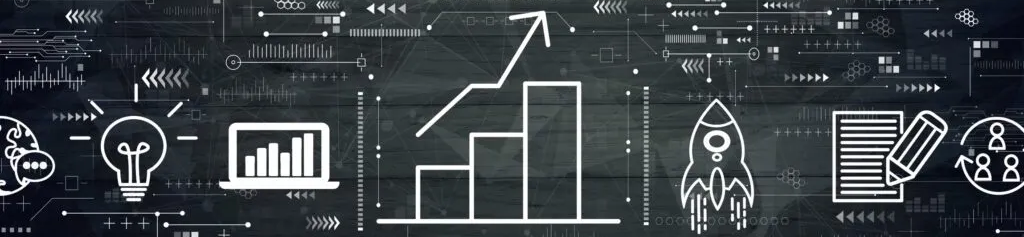


**Evaluating a text summarization model** involves assessing its performance in generating accurate and concise summaries compared to reference summaries or human-written summaries. Here are some common evaluation metrics and techniques you can consider:


---



### 1. **ROUGE (Recall-Oriented Understudy for Gisting Evaluation)**:

---



      *  ROUGE is a popular metric for evaluating text summarization models.

      *  It measures the overlap between the model-generated summary and the reference summary in terms of n-grams (unigrams,
      bigrams, etc.)

      *  **ROUGE scores include** ➖

                    ✔ ROUGE-N (for n-gram overlap)

                    ✔ ROUGE-L (for longest common subsequence)
                    
                    ✔ ROUGE-W (for weighted overlap).


---


### 2. **BLEU (Bilingual Evaluation Understudy)**:


---

      *   Though primarily used for machine translation evaluation, BLEU can also be adapted for text summarization evaluation.

      *   It measures the precision of n-grams in the generated summary compared to reference summaries.


---



### 3. **METEOR (Metric for Evaluation of Translation with Explicit Ordering)**:


---
      *   METEOR evaluates summaries based on precision, recall, and alignment between model-generated and
      reference summaries, incorporating stemming and synonym matching.

# **Rouge (Recall-Oriented Understudy for Gisting Evaluation)**

In [134]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from nltk.corpus import stopwords

---
▶ **For BART :-**

---

In [153]:
# Sample reference and system-generated summaries
reference_summary = "Sunil Chhetri, a 149-captain national team player, is set to be felicitated by the All India Football Federation (AIFF) for his 150th senior international match in the FIFA World Cup 2026 qualifier."
system_summary = "SSunil chhetri will be felicitated by the all india football federation (aiff) He is expected to play his 150th senior international match in the fifa world cup 2026 qualifier on march 26. He has made 149 appearances for the national team, netting a record 93 goals."

In [154]:
# Tokenize summaries and remove stopwords
stop_words = set(stopwords.words('english'))
reference_tokens = [word for word in word_tokenize(reference_summary.lower()) if word.isalnum() and word not in stop_words]
system_tokens = [word for word in word_tokenize(system_summary.lower()) if word.isalnum() and word not in stop_words]

In [155]:
# Function to calculate ROUGE recall
def calculate_recall(reference, system, n):
    reference_ngrams = set(ngrams(reference, n))
    system_ngrams = set(ngrams(system, n))
    intersection = reference_ngrams.intersection(system_ngrams)
    return len(intersection) / len(reference_ngrams)

In [156]:
# Calculate ROUGE recall for unigrams
rouge_recall_unigrams = calculate_recall(reference_tokens, system_tokens, 1)
print("ROUGE Recall (Unigrams):", rouge_recall_unigrams)

ROUGE Recall (Unigrams): 0.85


In [157]:
# Calculate ROUGE recall for bigrams
rouge_recall_bigrams = calculate_recall(reference_tokens, system_tokens, 2)
print("ROUGE Recall (Bigrams):", rouge_recall_bigrams)

ROUGE Recall (Bigrams): 0.6842105263157895


In [158]:
# Function to calculate ROUGE precision
def calculate_precision(reference, system, n):
    reference_ngrams = set(ngrams(reference, n))
    system_ngrams = set(ngrams(system, n))
    intersection = reference_ngrams.intersection(system_ngrams)
    return len(intersection) / len(system_ngrams)

In [159]:
# Calculate ROUGE precision for unigrams
rouge_precision_unigrams = calculate_precision(reference_tokens, system_tokens, 1)
print("ROUGE Precision (Unigrams):", rouge_precision_unigrams)

ROUGE Precision (Unigrams): 0.6071428571428571


In [160]:
# Calculate ROUGE precision for bigrams
rouge_precision_bigrams = calculate_precision(reference_tokens, system_tokens, 2)
print("ROUGE Precision (Bigrams):", rouge_precision_bigrams)

ROUGE Precision (Bigrams): 0.48148148148148145


In [161]:
# Calculate ROUGE F-measure
rouge_f_measure = (2 * rouge_recall_unigrams * rouge_precision_unigrams) / (rouge_recall_unigrams + rouge_precision_unigrams)
print("ROUGE F-Measure:", rouge_f_measure)

ROUGE F-Measure: 0.7083333333333333


A ROUGE F-measure of 0.71 indicates that the system-generated summary captures approximately 71% of the content and meaning present in the reference summary. This score suggests a relatively good summarization performance, indicating that the system-generated summary aligns well with the reference summary.

---
▶ **For TF-IDF :-**

---

In [162]:
# Sample reference and system-generated summaries
reference_summary = "Sunil Chhetri, a 149-captain national team player, is set to be felicitated by the All India Football Federation (AIFF) for his 150th senior international match in the FIFA World Cup 2026 qualifier."
system_summary = "Sunil chhetri, the captain of the indian men’s national team, will be felicitated by the all india football federation (aiff), who is expected to play his 150th senior international match in the fifa world cup 2026 qualifier on march 26. india, after drawing with afghanistan in the away leg, will host it at the indira gandhi international stadium in guwahati. “it’s been an awe-inspiring and staggering cruise that all of us have been fortunate to witness since 2005. chhetri playing his 150th international match is an extraordinary accomplishment that will go a long way in keeping the indian football flag flying high,” kalyan chaubey, the president of aiff, said."

In [163]:
# Tokenize summaries and remove stopwords
stop_words = set(stopwords.words('english'))
reference_tokens = [word for word in word_tokenize(reference_summary.lower()) if word.isalnum() and word not in stop_words]
system_tokens = [word for word in word_tokenize(system_summary.lower()) if word.isalnum() and word not in stop_words]

In [164]:
# Function to calculate ROUGE recall
def calculate_recall(reference, system, n):
    reference_ngrams = set(ngrams(reference, n))
    system_ngrams = set(ngrams(system, n))
    intersection = reference_ngrams.intersection(system_ngrams)
    return len(intersection) / len(reference_ngrams)

In [165]:
# Calculate ROUGE recall for unigrams
rouge_recall_unigrams = calculate_recall(reference_tokens, system_tokens, 1)
print("ROUGE Recall (Unigrams):", rouge_recall_unigrams)

ROUGE Recall (Unigrams): 0.9


In [166]:
# Calculate ROUGE recall for bigrams
rouge_recall_bigrams = calculate_recall(reference_tokens, system_tokens, 2)
print("ROUGE Recall (Bigrams):", rouge_recall_bigrams)

ROUGE Recall (Bigrams): 0.7368421052631579


In [167]:
# Function to calculate ROUGE precision
def calculate_precision(reference, system, n):
    reference_ngrams = set(ngrams(reference, n))
    system_ngrams = set(ngrams(system, n))
    intersection = reference_ngrams.intersection(system_ngrams)
    return len(intersection) / len(system_ngrams)

In [168]:
# Calculate ROUGE precision for unigrams
rouge_precision_unigrams = calculate_precision(reference_tokens, system_tokens, 1)
print("ROUGE Precision (Unigrams):", rouge_precision_unigrams)

ROUGE Precision (Unigrams): 0.33962264150943394


In [169]:
# Calculate ROUGE precision for bigrams
rouge_precision_bigrams = calculate_precision(reference_tokens, system_tokens, 2)
print("ROUGE Precision (Bigrams):", rouge_precision_bigrams)

ROUGE Precision (Bigrams): 0.23333333333333334


In [170]:
# Calculate ROUGE F-measure
rouge_f_measure = (2 * rouge_recall_unigrams * rouge_precision_unigrams) / (rouge_recall_unigrams + rouge_precision_unigrams)
print("ROUGE F-Measure:", rouge_f_measure)

ROUGE F-Measure: 0.4931506849315068


A ROUGE F-measure of 0.49 indicates that the system-generated summary captures approximately 49% of the content and meaning present in the reference summary. This score suggests a relatively decent summarization performance, suggesting that there is room for improvement.

---
▶ **For Word Frequency :-**

---

In [171]:
# Sample reference and system-generated summaries
reference_summary = "Sunil Chhetri, a 149-captain national team player, is set to be felicitated by the All India Football Federation (AIFF) for his 150th senior international match in the FIFA World Cup 2026 qualifier."
system_summary = "in many football fans’ eyes, chhetri is almost the synonym of the indian men’s national team, something that is not far from the truth.', 'he is also the third-highest active goalscorer (93 goals) in international football, just below cristiano ronaldo (128 goals) and lionel messi (106 goals)."

In [172]:
# Tokenize summaries and remove stopwords
stop_words = set(stopwords.words('english'))
reference_tokens = [word for word in word_tokenize(reference_summary.lower()) if word.isalnum() and word not in stop_words]
system_tokens = [word for word in word_tokenize(system_summary.lower()) if word.isalnum() and word not in stop_words]

In [173]:
# Function to calculate ROUGE recall
def calculate_recall(reference, system, n):
    reference_ngrams = set(ngrams(reference, n))
    system_ngrams = set(ngrams(system, n))
    intersection = reference_ngrams.intersection(system_ngrams)
    return len(intersection) / len(reference_ngrams)

In [174]:
# Calculate ROUGE recall for unigrams
rouge_recall_unigrams = calculate_recall(reference_tokens, system_tokens, 1)
print("ROUGE Recall (Unigrams):", rouge_recall_unigrams)

ROUGE Recall (Unigrams): 0.25


In [175]:
# Calculate ROUGE recall for bigrams
rouge_recall_bigrams = calculate_recall(reference_tokens, system_tokens, 2)
print("ROUGE Recall (Bigrams):", rouge_recall_bigrams)

ROUGE Recall (Bigrams): 0.05263157894736842


In [176]:
# Function to calculate ROUGE precision
def calculate_precision(reference, system, n):
    reference_ngrams = set(ngrams(reference, n))
    system_ngrams = set(ngrams(system, n))
    intersection = reference_ngrams.intersection(system_ngrams)
    return len(intersection) / len(system_ngrams)

In [177]:
# Calculate ROUGE precision for unigrams
rouge_precision_unigrams = calculate_precision(reference_tokens, system_tokens, 1)
print("ROUGE Precision (Unigrams):", rouge_precision_unigrams)

ROUGE Precision (Unigrams): 0.19230769230769232


In [178]:
# Calculate ROUGE precision for bigrams
rouge_precision_bigrams = calculate_precision(reference_tokens, system_tokens, 2)
print("ROUGE Precision (Bigrams):", rouge_precision_bigrams)

ROUGE Precision (Bigrams): 0.03571428571428571


In [179]:
# Calculate ROUGE F-measure
rouge_f_measure = (2 * rouge_recall_unigrams * rouge_precision_unigrams) / (rouge_recall_unigrams + rouge_precision_unigrams)
print("ROUGE F-Measure:", rouge_f_measure)

ROUGE F-Measure: 0.2173913043478261


A ROUGE F-measure of 0.21 indicates that the system-generated summary captures approximately 21% of the content and meaning present in the reference summary. In other words, the system's summarization performance is relatively low, suggesting that there is room for improvement.

![[removal.ai]_b40eab07-6220-47d9-a594-4c7f4c22128b-ty.png](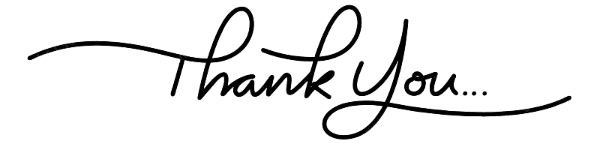)